
# Electricity Bill Prediction Using Machine Learning (Regression)

**Course:** Concepts and Technologies of AI (5CS037)  
**Assessment:** Regression Task  
**Student Name:** Kuldeep Mandal  
**University ID:** 2505925  





## 1. Introduction

Electricity consumption is a major part of household expenses. Predicting monthly electricity bills helps
households understand consumption patterns, plan budgets, and reduce unnecessary usage.

In this project, regression-based machine learning models are used to predict the **monthly electricity bill**
based on appliance usage, total usage hours, and tariff rates.



## 2. Research Question and Objective

### Research Question
Can household electricity usage and appliance-related variables be used to accurately predict monthly electricity bills?

### Objective
The objectives of this project are:
- to explore and understand the electricity bill dataset,
- to preprocess and prepare the data for regression,
- to build baseline, tuned, and feature-selected regression models,
- to evaluate and compare models using standard regression metrics.



## 3. Dataset Source and Description

### 3.1 Dataset Source
The dataset used in this project is obtained from **Kaggle – Electricity Bill Dataset**.

### 3.2 Dataset Description
The dataset contains numerical features representing household appliance usage, total monthly electricity
usage hours, tariff rates, and the resulting electricity bill.

- Number of records: 10000+  
- Number of features: 12
- Target variable: ElectricityBill  


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### 3.3 Feature Description

| Feature | Description |
|-------|-------------|
| Fan | Fan electricity usage |
| Refrigerator | Refrigerator electricity usage |
| AirConditioner | Air conditioner usage |
| Television | Television usage |
| Monitor | Monitor usage |
| MotorPump | Motor pump usage |
| Month | Month number |
| City | City name |
| Company | Electricity provider compamy |
| MonthlyHours | Total monthly electricity usage hours |
| TariffRate | Electricity tariff per unit |
| ElectricityBill | Monthly electricity bill (target) |



## 4. Importing Required Libraries


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 5. Data Loading and Initial Inspection


In [12]:

df = pd.read_csv("/content/drive/MyDrive/Final/electricity_bill_dataset.csv")
df.head()


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4



Dataset information and missing values are checked below.


In [50]:

df.info()
df.isnull().sum()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


,0
Fan,0
Refrigerator,0
AirConditioner,0
Television,0
Monitor,0
MotorPump,0
Month,0
City,0
Company,0
MonthlyHours,0



## 6. Exploratory Data Analysis (EDA)

EDA is performed to understand data distribution and relationships before modeling.



### 6.1 Distribution of Electricity Bill

This histogram shows how electricity bill values are distributed across households.


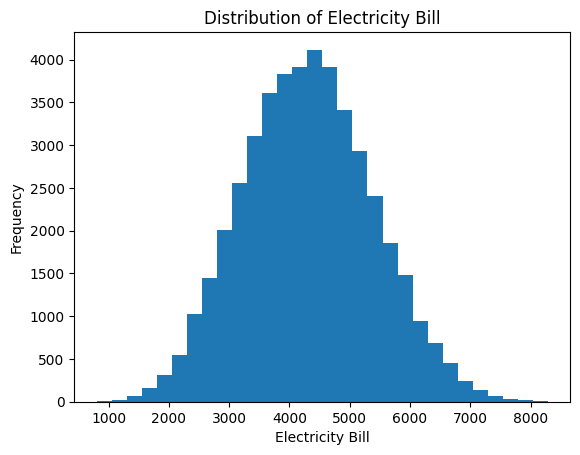

In [15]:
plt.hist(df["ElectricityBill"], bins=30)
plt.xlabel("Electricity Bill")
plt.ylabel("Frequency")
plt.title("Distribution of Electricity Bill")
plt.show()

# This histogram visualizes the distribution of the 'ElectricityBill' column.
# The x-axis represents the range of electricity bill values,
# and the y-axis shows the number of households (frequency) falling into each bill range.
# It helps to understand the central tendency, spread, and shape of the bill amounts.


### 6.2 Monthly Usage Hours vs Electricity Bill

This scatter plot shows the relationship between total monthly usage hours and electricity bill.


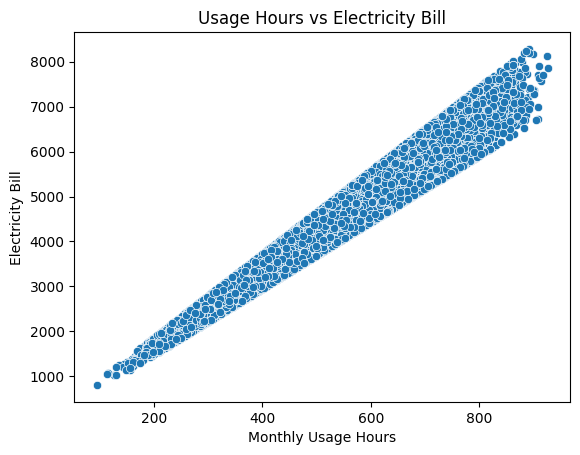

In [16]:

sns.scatterplot(x=df["MonthlyHours"], y=df["ElectricityBill"])
plt.xlabel("Monthly Usage Hours")
plt.ylabel("Electricity Bill")
plt.title("Usage Hours vs Electricity Bill")
plt.show()



### 6.3 Correlation Heatmap

The heatmap shows correlations between input features and the electricity bill.


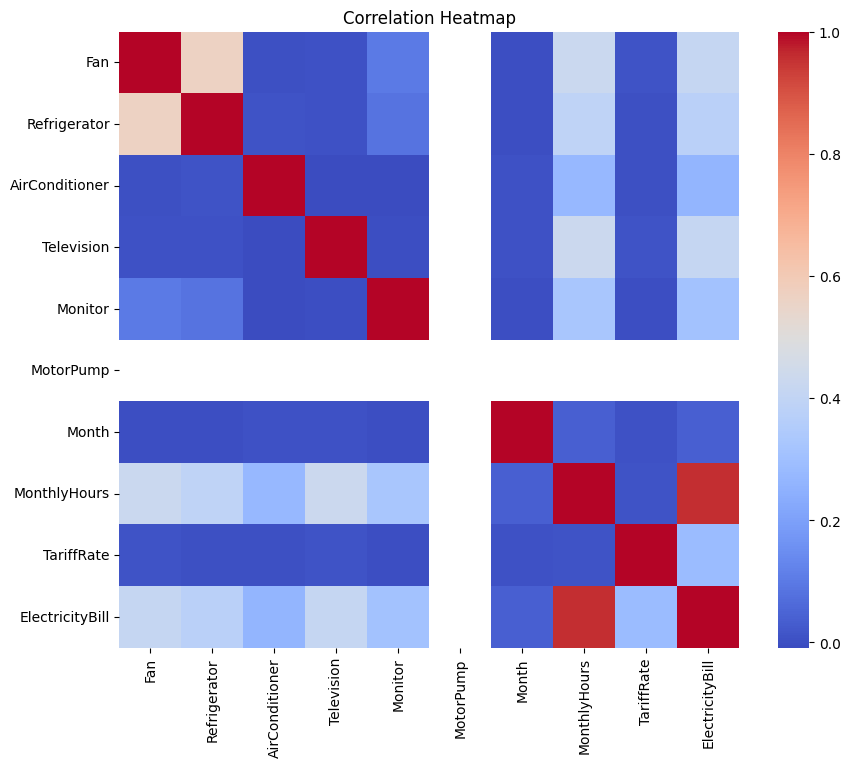

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 7. Data Preprocessing

Features and target variable are separated, scaled, and split into training and testing sets.


In [18]:
X = df.drop(columns=["ElectricityBill", "City", "Company"])
y = df["ElectricityBill"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

Training set: (36276, 9) (36276,)
Testing set: (9069, 9) (9069,)


In [49]:
# X = df.drop('ElectricityBill', axis=1)
# y = df['ElectricityBill']

# print("Features shape:", X.shape)
# print("Target shape:", y.shape)

Features shape: (45345, 11)
Target shape: (45345,)



## 8. Model Training and Evaluation

Regression models are evaluated using MAE, RMSE, and R² score.


In [20]:

def evaluate_regression(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }




### Neural Network (MLP Regressor)


In [29]:
# mlp = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
# mlp.fit(X_train, y_train)

# y_pred_mlp = mlp.predict(X_test)
# mlp_test_metrics = evaluate_regression(y_test, y_pred_mlp)

# print("MLP MAE:", mlp_test_metrics["MAE"])
# print("MLP RMSE:", mlp_test_metrics["RMSE"])
# print("MLP R2:", mlp_test_metrics["R2"])

In [30]:
mlp = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mlp_test_metrics = evaluate_regression(y_test, y_pred_mlp)
mlp_test_metrics


print("MLP MAE:", mlp_test_metrics["MAE"])
print("MLP RMSE:", mlp_test_metrics["RMSE"])
print("MLP R2:", mlp_test_metrics["R2"])

MLP MAE: 1.7072437575977504
MLP RMSE: 2.2517905327047005
MLP R2: 0.9999955498717751



### 8.1 Linear Regression – Baseline Model


In [21]:
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# y_pred_lr = lr.predict(X_test)
# lr_test_metrics = evaluate_regression(y_test, y_pred_lr)
# lr_test_metrics

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
lr_test_metrics = evaluate_regression(y_test, y_pred_lr)
print("LR MAE:", lr_test_metrics["MAE"])
print("LR RMSE:", lr_test_metrics["RMSE"])
print("LR R2:", lr_test_metrics["R2"])

LR MAE: 49.1937608797549
LR RMSE: 70.49629910886932
LR R2: 0.9956383663641158



### 8.2 Random Forest Regressor – Baseline and Tuned Models


In [23]:
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

# y_pred_rf = rf.predict(X_test)
# rf_test_metrics = evaluate_regression(y_test, y_pred_rf)
# rf_test_metrics

In [24]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_test_metrics = evaluate_regression(y_test, y_pred_rf)
print("RF MAE:", rf_test_metrics["MAE"])
print("RF RMSE:", rf_test_metrics["RMSE"])
print("RF R2:", rf_test_metrics["R2"])

RF MAE: 1.3486564119536504
RF RMSE: 5.236123757458231
RF R2: 0.9999759377434757


In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV.
# 'n_estimators' are the number of trees in the forest.
# 'max_depth' is the maximum depth of the tree (None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples).
param_dist = {
    "n_estimators": [20, 30, 40],
    "max_depth": [5, 10, None]
}

# Initialize RandomizedSearchCV.
# It samples a fixed number of hyperparameter settings from the defined distributions.
# n_iter: The number of parameter settings that are sampled. This controls the 'randomness' and efficiency.
# cv: Number of folds in cross-validation.
# scoring: Metric used to evaluate the model performance (R-squared in this case).
# n_jobs: Number of jobs to run in parallel (-1 means use all available processors).
# random_state: For reproducibility of the random sampling.
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=3,     # VERY important: small number to demonstrate, typically larger for actual tuning
    cv=3,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV to the training data to find the best hyperparameters.
# This process involves training 'n_iter' models, each with 'cv' folds.
random_search.fit(X_train, y_train)

# Output the best hyperparameters found by RandomizedSearchCV.
random_search.best_params_

{'n_estimators': 30, 'max_depth': None}

**Random Forest- Feature Selection**

In [47]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
selected_features

Index(['Fan', 'Refrigerator', 'Television', 'MonthlyHours', 'TariffRate'], dtype='object')

**RF - Tuned**

In [45]:
rf_tuned = RandomForestRegressor(**best_rf_params, random_state=42)
rf_tuned.fit(X_train, y_train)

y_pred_rf_tuned = rf_tuned.predict(X_test)
rf_tuned_test_metrics = evaluate_regression(y_test, y_pred_rf_tuned)
print("RF Tuned MAE:", rf_tuned_test_metrics["MAE"])
print("RF Tuned RMSE:", rf_tuned_test_metrics["RMSE"])
print("RF Tuned R2:", rf_tuned_test_metrics["R2"])

RF Tuned MAE: 1.3486564119536504
RF Tuned RMSE: 5.236123757458231
RF Tuned R2: 0.9999759377434757



## 9. Feature Selection using RFE (Linear Regression)


In [31]:

rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X_train_df, y_train)

selected_features = X.columns[rfe.support_]
selected_features


Index(['Fan', 'Refrigerator', 'Television', 'MonthlyHours', 'TariffRate'], dtype='object')

# 9.1 Final Linear Regression Model (Feature Selected)


In [32]:
X_train_fs = X_train_df[selected_features]
X_test_fs = X_test_df[selected_features]

lr_fs = LinearRegression()
lr_fs.fit(X_train_fs, y_train)

y_pred_lr_fs = lr_fs.predict(X_test_fs)
lr_fs_test_metrics = evaluate_regression(y_test, y_pred_lr_fs)

print("Final LR (Feature Selected) MAE:", lr_fs_test_metrics["MAE"])
print("Final LR (Feature Selected) RMSE:", lr_fs_test_metrics["RMSE"])
print("Final LR (Feature Selected) R2:", lr_fs_test_metrics["R2"])

Final LR (Feature Selected) MAE: 49.196869392004906
Final LR (Feature Selected) RMSE: 70.49624060147227
Final LR (Feature Selected) R2: 0.995638373603864



## 10. Final Model Comparison


In [33]:
final_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression (Baseline)",
        "Random Forest (Baseline)",
        "Random Forest (Tuned)",
        "Neural Network (MLP)",
        "Linear Regression (Feature Selected)"
    ],
    "Features Used": [
        "All Features",
        "All Features",
        "Selected Features",
        "All Features",
        "Selected Features"
    ],
    "MAE": [
        lr_test_metrics["MAE"],
        rf_test_metrics ["MAE"],
        rf_tuned_test_metrics["MAE"],
        mlp_test_metrics["MAE"],
        lr_fs_test_metrics["MAE"]
    ],
    "RMSE": [
        lr_test_metrics["RMSE"],
        rf_test_metrics ["RMSE"],
        rf_tuned_test_metrics["RMSE"],
        mlp_test_metrics["RMSE"],
        lr_fs_test_metrics["RMSE"]
    ],
    "R2 Score": [
        lr_test_metrics["R2"],
        rf_test_metrics ["R2"],
        rf_tuned_test_metrics["R2"],
        mlp_test_metrics["R2"],
        lr_fs_test_metrics["R2"]
    ]
})

final_comparison

,Model,Features Used,MAE,RMSE,R2 Score
0,Linear Regression (Baseline),All Features,49.193761,70.496299,0.995638
1,Random Forest (Baseline),All Features,1.348656,5.236124,0.999976
2,Random Forest (Tuned),Selected Features,1.348656,5.236124,0.999976
3,Neural Network (MLP),All Features,1.707244,2.251791,0.999996
4,Linear Regression (Feature Selected),Selected Features,49.196869,70.496241,0.995638


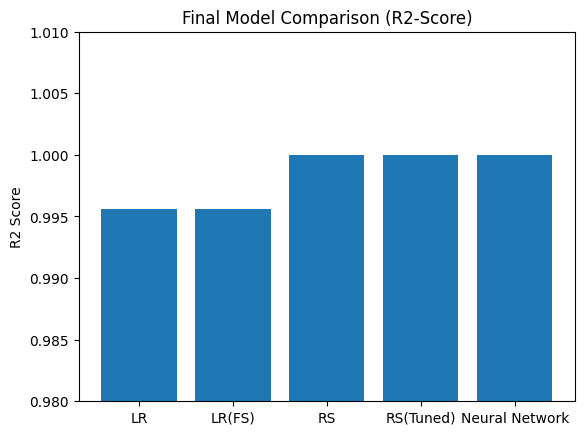

In [48]:
models = ["LR", "LR(FS)", "RS", "RS(Tuned)", "Neural Network"]
f1_scores = [
    lr_test_metrics["R2"],
    lr_fs_test_metrics["R2"],
    rf_test_metrics ["R2"],
    rf_tuned_test_metrics["R2"],
    mlp_test_metrics["R2"]
]

plt.bar(models, f1_scores)
plt.ylabel("R2 Score")
plt.title("Final Model Comparison (R2-Score)")
plt.ylim(0.98, 1.01)
plt.show()


## 11. Conclusion

This project shows that household electricity usage and tariff-related variables can be used to accurately predict monthly electricity bills. Among the evaluated models, the Random Forest and Neural Network (MLP) regressors achieved the best performance, producing very low prediction errors and high R² scores, indicating strong predictive capability. The Linear Regression model served as a simple and interpretable baseline but showed higher prediction errors compared to the other models. Overall, the results highlight the effectiveness of advanced machine learning models for electricity bill prediction.
